In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import folium
from folium.plugins import MarkerCluster
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [172]:
migrantsdf = pd.read_excel('missingmigrants-global.xlsx')

In [173]:
migrantsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1240 entries, 0 to 1239
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Main ID                              1240 non-null   object 
 1   Incident ID                          1240 non-null   object 
 2   Region                               1240 non-null   object 
 3   Incident Date                        1240 non-null   object 
 4   Year                                 1240 non-null   int64  
 5   Reported Month                       1240 non-null   object 
 6   Number Dead                          1140 non-null   float64
 7   Minimum Estimated Number of Missing  177 non-null    float64
 8   Total Number of Dead and Missing     1240 non-null   int64  
 9   Number of Survivors                  287 non-null    float64
 10  Number of Females                    219 non-null    float64
 11  Number of Males               

In [174]:
migrantsdf.head(10)

,Main ID,Incident ID,Region,Incident Date,Year,Reported Month,Number Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,Number of Survivors,...,Number of Males,Number of Children,Cause of Death,Location of death,Information Source,Coordinates,Migrantion route,URL,UNSD Geographical Grouping,Source Quality
0,2022.MMP00001,2022.MMP00001,Mediterranean,"Sun, 01/02/2022 - 12:00",2022,January,1.0,NaN,1,NaN,...,NaN,1.0,Drowning,"Retrieved from waters one mile off Aftis, El A...",DPC Jijel,"36.71614878, 5.552716421",Western Mediterranean,https://archive.vn/Fm04u,Uncategorized,5
1,2022.MMP00002,2022.MMP00002,Mediterranean,"Mon, 01/03/2022 - 12:00",2022,January,3.0,8.0,11,3.0,...,NaN,NaN,Drowning,"Off Plage Ben Zouit, Kerkera, Skikda, Algeria ...","DPC Skkikda, Echorouk Online, Akher Saa","36.97321267, 6.599006494",Central Mediterranean,"https://archive.vn/ExMIR, https://archive.vn/Y...",Uncategorized,5
2,2022.MMP00003,2022.MMP00003,Southern Africa,"Mon, 01/03/2022 - 12:00",2022,January,3.0,3.0,6,2.0,...,6.0,NaN,Drowning,"Limpopo river, near Maroi, Limpopo province, S...",IOM Zimbabwe,"-22.177258, 29.862273",NaN,NaN,Uncategorized,5
3,2022.MMP00004,2022.MMP00004,Mediterranean,"Mon, 01/03/2022 - 12:00",2022,January,3.0,14.0,17,16.0,...,NaN,1.0,Drowning,"Off the coast of Cabo de Gata, Almería, Spain","IOM Spain, El País, ABC","36.523849, -2.117221",Western Mediterranean,"https://archive.ph/y0PiC, https://archive.ph/f...",Uncategorized,4
4,2022.MMP00005,2022.MMP00005,Southern Asia,"Sat, 01/01/2022 - 12:00",2022,January,1.0,NaN,1,2.0,...,NaN,NaN,Harsh environmental conditions / lack of adequ...,"Remains found near the village of Belasur, Kho...",Twitter@tcvanvaliligi (Türkiye-Van Governor's ...,"38.566055, 44.344085",Iran to Türkiye,"https://archive.ph/MjeLH, https://archive.ph/b...",Southern Asia,5
5,2022.MMP00006,2022.MMP00006,Southern Asia,"Tue, 01/04/2022 - 12:00",2022,January,8.0,NaN,8,16.0,...,NaN,NaN,Vehicle accident / death linked to hazardous t...,"KM60 of Khash-Iranshahr highway, Sistan and Ba...","Islamic Republic News Agency, Young Journalist...","28.64045, 60.789299",Afghanistan to Iran,"https://archive.ph/4kfZB, https://archive.ph/D...",Southern Asia,3
6,2022.MMP00008,2022.MMP00008,Mediterranean,"Tue, 01/11/2022 - 12:00",2022,January,1.0,NaN,1,NaN,...,NaN,NaN,Drowning,Retrieved from waters 900 meters off Rocher Pl...,DPC Tipaza,"36.5918492, 2.548609412",Western Mediterranean,https://archive.vn/0wQPa,Uncategorized,5
7,2022.MMP00009,2022.MMP00009,Mediterranean,"Wed, 01/12/2022 - 12:00",2022,January,1.0,NaN,1,NaN,...,1.0,NaN,Drowning,"Remains washed ashore Plage Gounini, Tipaza, A...",DPC Tipaza,"36.56840211, 2.020841623",Western Mediterranean,https://archive.vn/o7wdP,Uncategorized,5
8,2022.MMP00010,2022.MMP00010,Europe,"Mon, 01/10/2022 - 12:00",2022,January,1.0,NaN,1,NaN,...,NaN,NaN,Vehicle accident / death linked to hazardous t...,"Train tracks in Donji Hadzici, Bosnia and Herz...",Sarajevo Canton Ministry of the Interior via I...,"43.82935627, 18.21447933",Western Balkans,https://archive.ph/V5S5k,Southern Europe,5
9,2022.MMP00011,2022.MMP00011,Central America,"Sat, 01/01/2022 - 12:00",2022,January,1.0,NaN,1,NaN,...,1.0,NaN,Violence,"Chaparral International Bridge,Tijuana,Baja Ca...",Citizens' Committee for the Defense of Natural...,"32.53901177, -117.033951",US-Mexico border crossing,"https://bit.ly/31sGDti, https://archive.ph/Kho...",Central America,3


In [175]:
# checking if there are any null values in the dataset
migrantsdf.isna().sum()

Main ID                                   0
Incident ID                               0
Region                                    0
Incident Date                             0
Year                                      0
Reported Month                            0
Number Dead                             100
Minimum Estimated Number of Missing    1063
Total Number of Dead and Missing          0
Number of Survivors                     953
Number of Females                      1021
Number of Males                         477
Number of Children                     1096
Cause of Death                            0
Location of death                         0
Information Source                        0
Coordinates                               0
Migrantion route                        196
URL                                     400
UNSD Geographical Grouping                1
Source Quality                            0
dtype: int64

In [176]:
migrantsdf['Minimum Estimated Number of Missing'] = np.where(
    migrantsdf['Total Number of Dead and Missing'] - migrantsdf['Number Dead'] == 0,
    0,
    migrantsdf['Minimum Estimated Number of Missing']
)


In [177]:
migrantsdf = migrantsdf.drop(['Number of Survivors', 'Number of Females', 'Number of Males', 'Number of Children', 'Migrantion route', 'URL'],axis = 1)


In [178]:
migrantsdf.columns

Index(['Main ID', 'Incident ID', 'Region', 'Incident Date', 'Year',
       'Reported Month', 'Number Dead', 'Minimum Estimated Number of Missing',
       'Total Number of Dead and Missing', 'Cause of Death',
       'Location of death', 'Information Source', 'Coordinates',
       'UNSD Geographical Grouping', 'Source Quality'],
      dtype='object')

In [179]:
# checking if there are any null values in the dataset
migrantsdf.isna().sum()

Main ID                                  0
Incident ID                              0
Region                                   0
Incident Date                            0
Year                                     0
Reported Month                           0
Number Dead                            100
Minimum Estimated Number of Missing      0
Total Number of Dead and Missing         0
Cause of Death                           0
Location of death                        0
Information Source                       0
Coordinates                              0
UNSD Geographical Grouping               1
Source Quality                           0
dtype: int64

In [180]:
migrantsdf.dropna(subset=['Number Dead', 'UNSD Geographical Grouping'], inplace=True)

In [181]:
migrantsdf['Region'].value_counts()

North America         234
Southern Asia         210
Central America       199
Mediterranean         194
Europe                 85
Northern Africa        68
Eastern Africa         34
South America          32
South-eastern Asia     24
Western Asia           22
Caribbean              19
Western Africa         13
Southern Africa         3
Middle Africa           1
Eastern Asia            1
Name: Region, dtype: int64

In [182]:
migrantsdf = migrantsdf.reindex(columns=['Main ID', 'Incident ID', 'Region', 'Incident Date', 'Year', 'Reported Month', 'Cause of Death', 'Location of death', 'Information Source', 'Coordinates', 'UNSD Geographical Grouping', 'Source Quality', 'Number Dead', 'Minimum Estimated Number of Missing', 'Total Number of Dead and Missing'])


In [183]:
migrantsdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1139 entries, 0 to 1237
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Main ID                              1139 non-null   object 
 1   Incident ID                          1139 non-null   object 
 2   Region                               1139 non-null   object 
 3   Incident Date                        1139 non-null   object 
 4   Year                                 1139 non-null   int64  
 5   Reported Month                       1139 non-null   object 
 6   Cause of Death                       1139 non-null   object 
 7   Location of death                    1139 non-null   object 
 8   Information Source                   1139 non-null   object 
 9   Coordinates                          1139 non-null   object 
 10  UNSD Geographical Grouping           1139 non-null   object 
 11  Source Quality                

   Reported Month                             Variable  Count
0           April                          Number Dead  217.0
1          August                          Number Dead  208.0
2        February                          Number Dead  209.0
3         January                          Number Dead  223.0
4            July                          Number Dead  190.0
5            June                          Number Dead  253.0
6           March                          Number Dead  172.0
7             May                          Number Dead  235.0
8         October                          Number Dead  155.0
9       September                          Number Dead  244.0
10          April  Minimum Estimated Number of Missing  129.0
11         August  Minimum Estimated Number of Missing   45.0
12       February  Minimum Estimated Number of Missing   86.0
13        January  Minimum Estimated Number of Missing  138.0
14           July  Minimum Estimated Number of Missing    8.0
15      

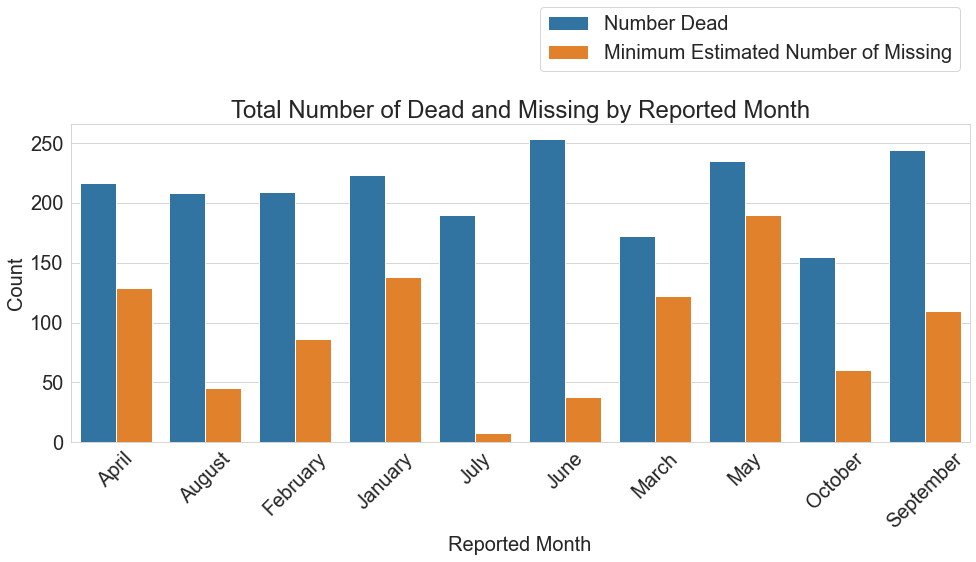

In [218]:
# Group the data by 'Reported Month' and calculate the sum of 'Number Dead' and 'Minimum Estimated Number of Missing'
grouped_df = migrantsdf.groupby('Reported Month').sum()[['Number Dead', 'Minimum Estimated Number of Missing']]

# Reset the index of the grouped dataframe
grouped_df = grouped_df.reset_index()

# Melt the dataframe to create a tidy format
melted_df = grouped_df.melt(id_vars='Reported Month', var_name='Variable', value_name='Count')
print(melted_df)

# Plot the combined comparison bar graph
plt.figure(figsize=(14, 7))
plt.subplots_adjust(bottom=0.2, top=0.4)  # Adjust the bottom and top margins to create more space
sns.barplot(data=melted_df, x='Reported Month', y='Count', hue='Variable')
plt.title('Total Number of Dead and Missing by Reported Month')
plt.xlabel('Reported Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(loc='upper right', bbox_to_anchor=(1, 1.4))
plt.tight_layout()  # Adjust the layout to prevent overlapping elements
plt.show()

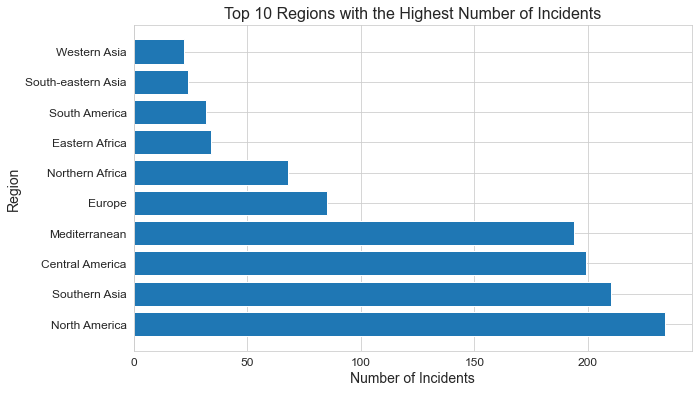

In [185]:
# Group the data by region and count the number of incidents
region_counts = migrantsdf.groupby('Region')['Incident ID'].count().reset_index()

# Sort the regions by incident count in descending order
region_counts = region_counts.sort_values(by='Incident ID', ascending=False)

# Plot the top 10 regions with the highest number of incidents
top_regions = region_counts.head(10)

# Adjust the figure size
plt.figure(figsize=(10, 6))

# Plot the bar chart
plt.barh(top_regions['Region'], top_regions['Incident ID'])

# Set the title with increased font size
plt.title('Top 10 Regions with the Highest Number of Incidents', fontsize=16)

# Set x-axis label with increased font size
plt.xlabel('Number of Incidents', fontsize=14)

# Set y-axis label with increased font size
plt.ylabel('Region', fontsize=14)

# Set the tick labels' font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.show()


Reported Month
April        346
August       253
February     295
January      361
July         198
June         291
March        294
May          425
October      215
September    354
Name: Total Number of Dead and Missing, dtype: int64


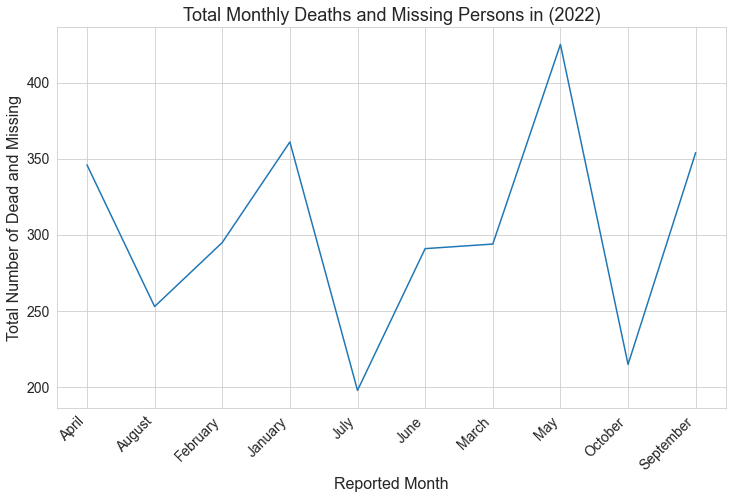

In [186]:
fig, ax = plt.subplots(figsize=(12, 7))  # Adjust the figure size

# Group the data by month and sum up the total number of deaths for each month
monthly_deaths = migrantsdf.groupby('Reported Month')['Total Number of Dead and Missing'].sum()
print(monthly_deaths)

# Create a line chart to show the trend of monthly deaths
ax.plot(monthly_deaths.index, monthly_deaths.values)

# Set x-axis label with increased font size
ax.set_xlabel('Reported Month', fontsize=16)

# Set y-axis label with increased font size
ax.set_ylabel('Total Number of Dead and Missing', fontsize=16)

# Set the title with increased font size
ax.set_title('Total Monthly Deaths and Missing Persons in (2022)', fontsize=18)

# Rotate the x-tick labels and set the tick labels' font size
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)

plt.show()


Reported Month
April        149
August        77
February      86
January      133
July          38
June          83
March         58
May          136
October      116
September    220
Name: Total Number of Dead and Missing, dtype: int64


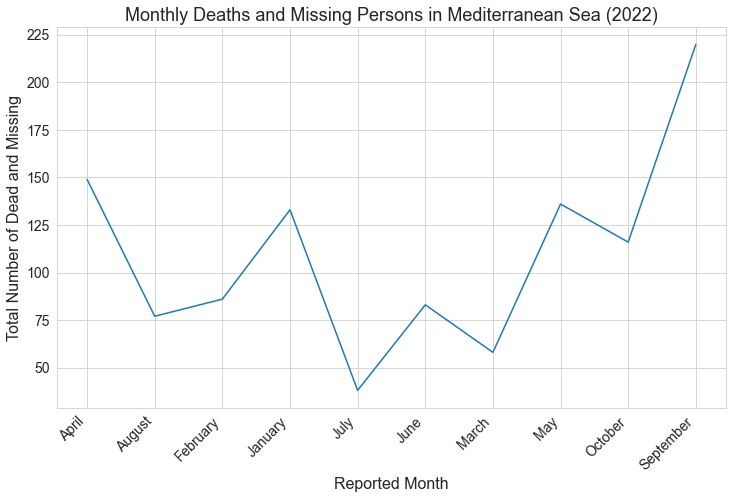

In [187]:
# Filter the dataset to include only incidents in the Mediterranean region
med_df = migrantsdf[migrantsdf['Region'] == 'Mediterranean']

# Group the incidents by year and count the number of incidents
med_grouped = med_df.groupby('Reported Month')['Total Number of Dead and Missing'].sum()
print(med_grouped)

# Create a line chart to show the trend of monthly deaths
fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(med_grouped.index, med_grouped.values)
ax.set_xlabel('Reported Month',fontsize=16)
ax.set_ylabel('Total Number of Dead and Missing',fontsize=16)
ax.set_title('Monthly Deaths and Missing Persons in Mediterranean Sea (2022)',fontsize=18)

# Rotate the x-tick labels
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)

plt.show()


Drowning                                                                  166
Mixed or unknown                                                           10
Harsh environmental conditions / lack of adequate shelter, food, water      8
Violence                                                                    5
Sickness / lack of access to adequate healthcare                            3
Vehicle accident / death linked to hazardous transport                      2
Name: Cause of Death, dtype: int64


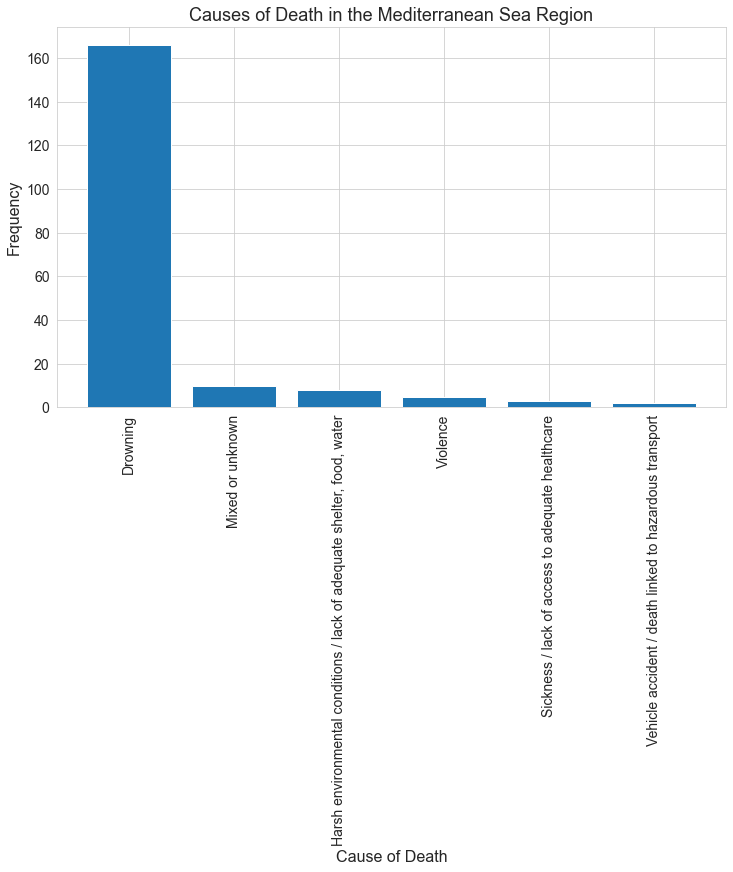

In [230]:
# Filter the dataset for the Mediterranean Sea region
mediterranean_df = migrantsdf[migrantsdf['Region'] == 'Mediterranean']
# Create a frequency table of the causes of death in the Mediterranean Sea region
cause_of_death_freq = mediterranean_df['Cause of Death'].value_counts()
print(cause_of_death_freq)
plt.figure(figsize=(12,7))
# Plot the frequency table as a bar chart
plt.bar(cause_of_death_freq.index, cause_of_death_freq.values)
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel('Cause of Death',fontsize=16)
plt.ylabel('Frequency',fontsize=16)
plt.title('Causes of Death in the Mediterranean Sea Region',fontsize=18)
plt.show()

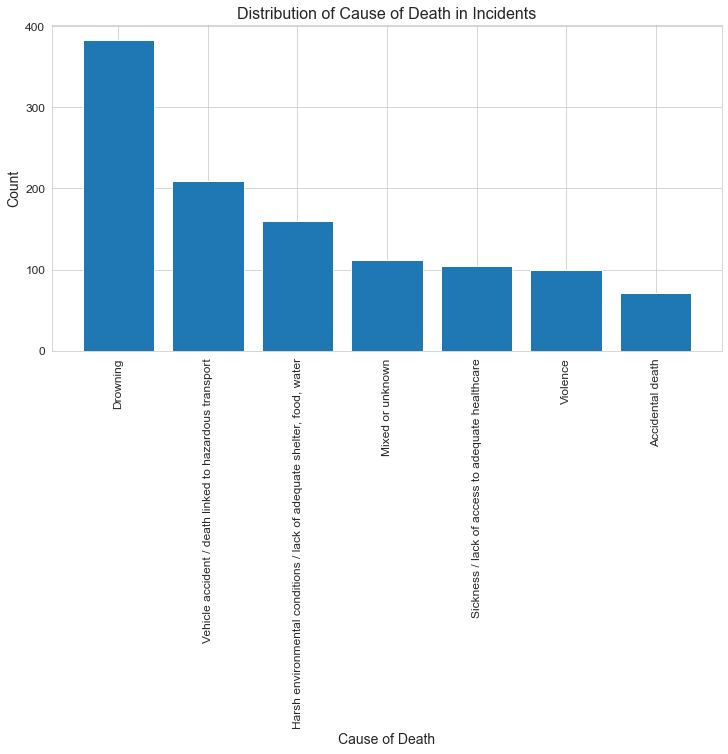

In [189]:
# the most common cause of death in these incidents
cause_of_death = migrantsdf['Cause of Death'].value_counts()
plt.figure(figsize=(12,6))
plt.bar(cause_of_death.index, cause_of_death.values)
plt.title('Distribution of Cause of Death in Incidents',fontsize=16)
plt.xlabel('Cause of Death',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Region
Mediterranean         1096
Northern Africa        398
North America          346
Central America        289
Southern Asia          222
South-eastern Asia     186
Europe                 129
Caribbean               97
Western Africa          83
Eastern Africa          72
South America           55
Western Asia            45
Southern Africa          8
Middle Africa            5
Eastern Asia             1
Name: Total Number of Dead and Missing, dtype: int64


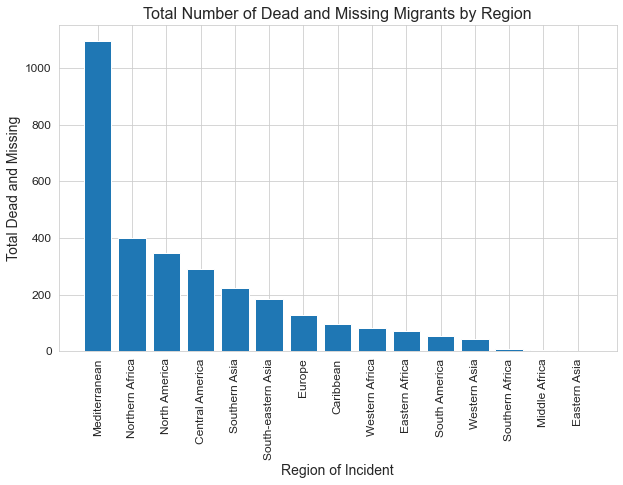

In [219]:
# Group the data by region and sum the total dead and missing
region_data = migrantsdf.groupby("Region")["Total Number of Dead and Missing"].sum()

# Sort the data in descending order
region_data = region_data.sort_values(ascending=False)
print(region_data)

# Plot the data
plt.figure(figsize=(10,6))
plt.bar(region_data.index, region_data.values)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Region of Incident",fontsize=14)
plt.ylabel("Total Dead and Missing",fontsize=14)
plt.title("Total Number of Dead and Missing Migrants by Region",fontsize=16)
plt.show()

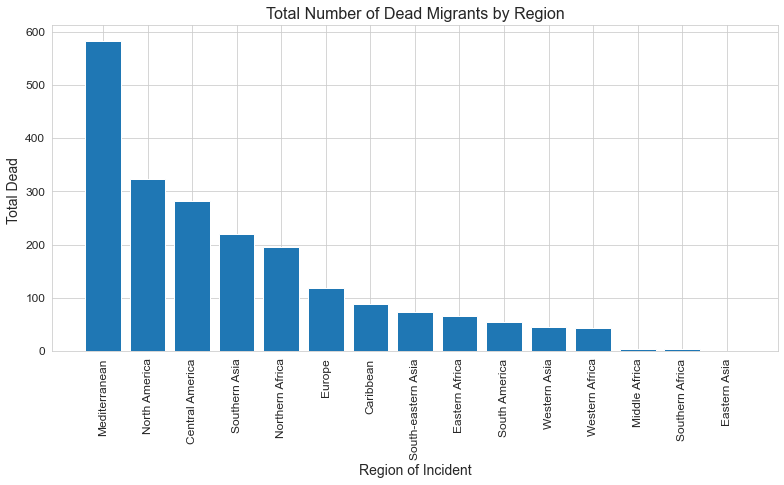

In [191]:
# Group the data by region and sum the total dead 
region_data = migrantsdf.groupby("Region")["Number Dead"].sum()

# Sort the data in descending order
region_data = region_data.sort_values(ascending=False)

# Plot the data
plt.figure(figsize=(13,6))
plt.bar(region_data.index, region_data.values)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Region of Incident",fontsize=14)
plt.ylabel("Total Dead ",fontsize=14)
plt.title("Total Number of Dead Migrants by Region",fontsize=16)
plt.show()

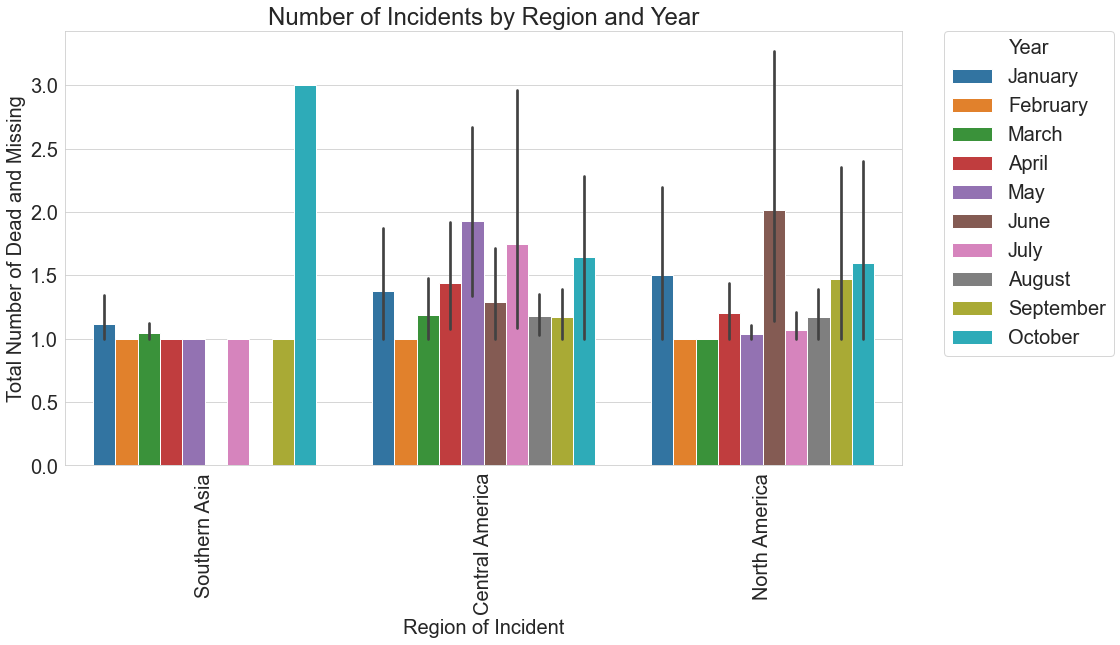

In [192]:
sns.set_style('whitegrid')

# Get the top 3 regions by incident count
top_regions = migrantsdf['Region'].value_counts().head(3).index

plt.figure(figsize=(15, 8))

# Filter the data for the top 3 regions
filtered_data = migrantsdf[migrantsdf['Region'].isin(top_regions)]

# Plot the countplot with 'Total Number of Dead and Missing' on the y-axis
sns.barplot(data=filtered_data, x='Region', y='Number Dead', hue='Reported Month')

plt.title('Number of Incidents by Region and Year')
plt.xlabel('Region of Incident')
plt.ylabel('Total Number of Dead and Missing')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=90)

plt.show()


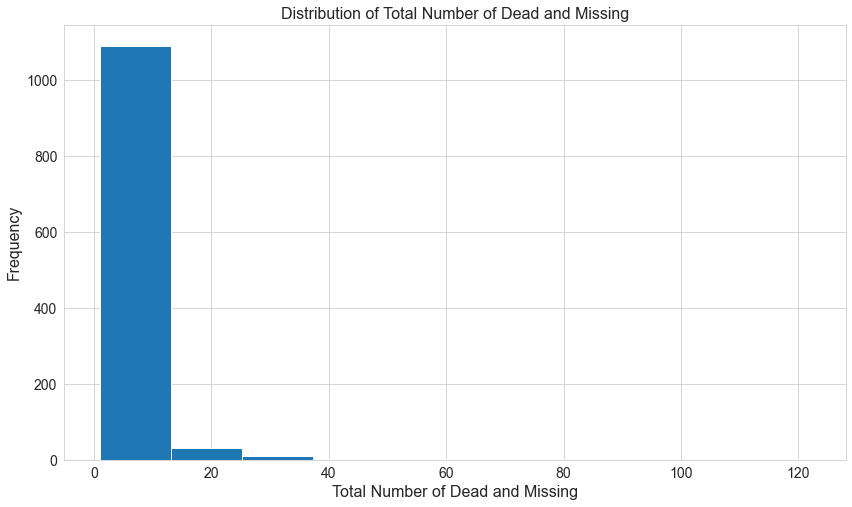

count    1139.000000
mean        2.661984
std         6.631717
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max       122.000000
Name: Total Number of Dead and Missing, dtype: float64


In [193]:
# Assuming your DataFrame is named 'migrantsdf'
target_variable = 'Total Number of Dead and Missing'

# Plotting a histogram
plt.figure(figsize=(14, 8))  # Adjust the figure size as per your requirement
plt.hist(migrantsdf[target_variable], bins=10)
plt.xlabel(target_variable,fontsize=16)
plt.ylabel('Frequency',fontsize=16)
plt.title('Distribution of ' + target_variable,fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Calculating summary statistics
summary_stats = migrantsdf[target_variable].describe()
print(summary_stats)


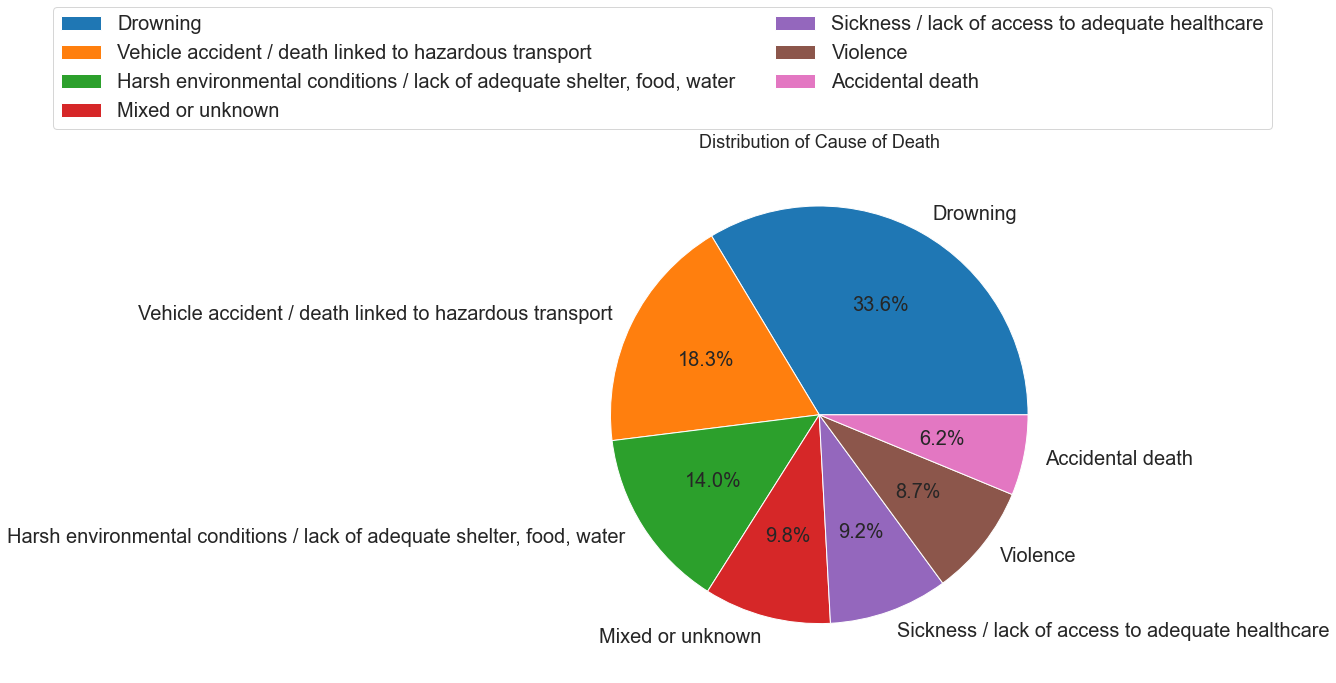

In [194]:
plt.figure(figsize=(10, 10))

# Get the value counts for 'Cause of Death' and plot the pie chart
cause_of_death_counts = migrantsdf['Cause of Death'].value_counts()
cause_of_death_counts.plot(kind='pie', autopct='%1.1f%%')

# Set the font size
font_size = 16

# Set the title with increased font size
plt.title('Distribution of Cause of Death', fontsize=font_size+2)

# Set the font size for class names and percentages inside the pie chart
plt.rcParams['font.size'] = 20

# Add class names onto the next line if they are too big
plt.subplots_adjust(top=0.85)  # Adjust the top margin
plt.legend(loc='upper center', bbox_to_anchor=(0.2, 1.3), ncol=2)  # Add legend with adjusted position

# Remove the y-label
plt.ylabel('')

plt.show()


In [228]:
migrantsdf['Cause of Death'].value_counts()

Drowning                                                                  383
Vehicle accident / death linked to hazardous transport                    209
Harsh environmental conditions / lack of adequate shelter, food, water    160
Mixed or unknown                                                          112
Sickness / lack of access to adequate healthcare                          105
Violence                                                                   99
Accidental death                                                           71
Name: Cause of Death, dtype: int64

In [195]:
# Assuming your DataFrame is named 'migrantsdf'
location_descriptions = migrantsdf['Location of death']

# Vectorize the text data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(location_descriptions)

# Apply K-means clustering
k = 4  # Number of clusters to generate
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

# Add cluster labels to the DataFrame
migrantsdf['Cluster'] = kmeans.labels_

# Print the cluster assignments for each location description
print(migrantsdf[['Location of death', 'Cluster']].head(10))


                                   Location of death  Cluster
0  Retrieved from waters one mile off Aftis, El A...        2
1  Off Plage Ben Zouit, Kerkera, Skikda, Algeria ...        2
2  Limpopo river, near Maroi, Limpopo province, S...        2
3      Off the coast of Cabo de Gata, Almería, Spain        2
4  Remains found near the village of Belasur, Kho...        2
5  KM60 of Khash-Iranshahr highway, Sistan and Ba...        2
6  Retrieved from waters 900 meters off Rocher Pl...        2
7  Remains washed ashore Plage Gounini, Tipaza, A...        2
8  Train tracks in Donji Hadzici, Bosnia and Herz...        2
9  Chaparral International Bridge,Tijuana,Baja Ca...        2


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


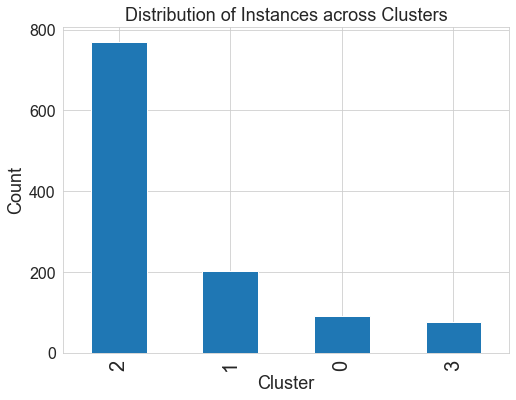

In [196]:
# Bar Plot of Cluster Counts
plt.figure(figsize=(8, 6))
ax = migrantsdf['Cluster'].value_counts().plot(kind='bar')
ax.set_xlabel('Cluster', fontsize=18)
ax.set_ylabel('Count', fontsize=18)
ax.set_title('Distribution of Instances across Clusters', fontsize=18)
plt.xticks(fontsize=20)
plt.yticks(fontsize=16)
plt.show()


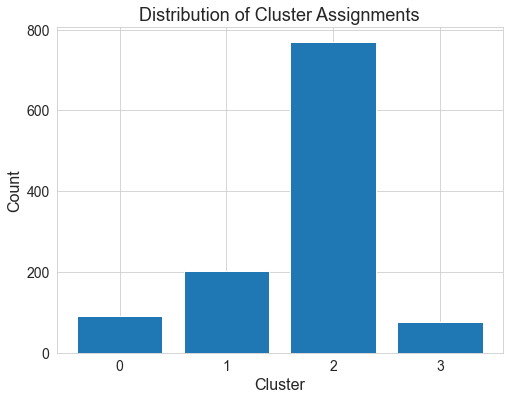

Cluster 0:
Number of instances: 92
Example location descriptions:
- Pima County Office of the Medical Examiner jurisdiction, Arizona, USA (see coordinates for exact location)
- Pima County Office of the Medical Examiner jurisdiction, Arizona, USA (see coordinates for exact location)
- Pima County Office of the Medical Examiner jurisdiction, Arizona, USA (see coordinates for exact location)
- Pima County Office of the Medical Examiner jurisdiction, Arizona, USA (see coordinates for exact location)
- Pima County Office of the Medical Examiner jurisdiction, Arizona, USA (see coordinates for exact location)

Cluster 1:
Number of instances: 202
Example location descriptions:
- Unspecified location in Tehran, Iran
- Unspecified location in Tehran, Iran
- Unspecified location in Tehran, Iran
- Unspecified location in Shiraz city, Fars province, Iran
- Unspecified location in Tehran, Iran

Cluster 2:
Number of instances: 769
Example location descriptions:
- Retrieved from waters one mile off A

In [197]:
# Plotting the distribution of cluster assignments
cluster_counts = migrantsdf['Cluster'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(cluster_counts.index, cluster_counts.values)
plt.xlabel('Cluster',fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.title('Distribution of Cluster Assignments',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Explore the content of each cluster
for cluster_id in range(k):
    cluster_data = migrantsdf[migrantsdf['Cluster'] == cluster_id]
    cluster_description = cluster_data['Location of death'].values
    
    print('Cluster {}:'.format(cluster_id))
    print('Number of instances: {}'.format(len(cluster_description)))
    print('Example location descriptions:')
    for desc in cluster_description[:5]:
        print('- {}'.format(desc))
    print()


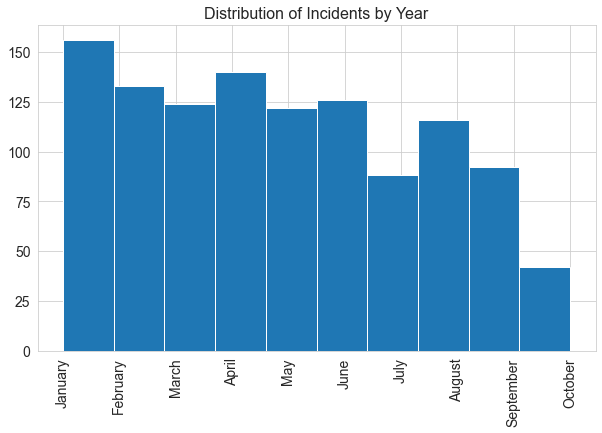

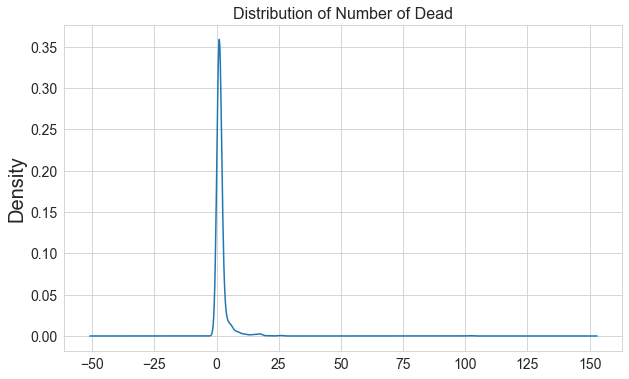

In [198]:
# Histogram for 'Year'
plt.figure(figsize=(10, 6))
plt.hist(migrantsdf['Reported Month'], bins=10)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(rotation=90)
plt.title('Distribution of Incidents by Year',fontsize=16)
plt.show()

# Density plot for 'Number Dead'
plt.figure(figsize=(10, 6))
migrantsdf['Number Dead'].plot(kind='density')
ax.set_xlabel('Number Dead', fontsize=14)
ax.set_ylabel('Density', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Distribution of Number of Dead', fontsize=16)
plt.show()


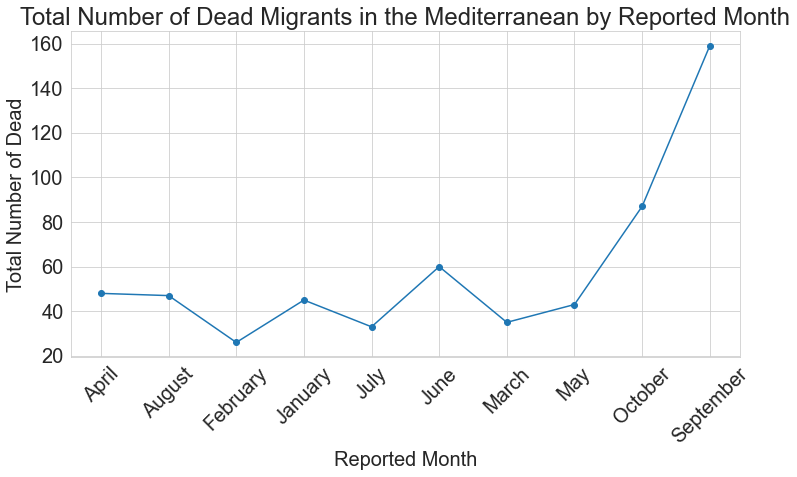

Total Number of Dead Migrants in the Mediterranean by Reported Month:
Reported Month
April         48.0
August        47.0
February      26.0
January       45.0
July          33.0
June          60.0
March         35.0
May           43.0
October       87.0
September    159.0
Name: Number Dead, dtype: float64


In [199]:
# Filter data for the Mediterranean region
mediterranean_data = migrantsdf[migrantsdf['Region'] == 'Mediterranean']

# Group the data by reported month and sum the total dead
monthly_deaths = mediterranean_data.groupby('Reported Month')['Number Dead'].sum()

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(monthly_deaths.index, monthly_deaths.values, marker='o')
plt.xlabel('Reported Month')
plt.ylabel('Total Number of Dead')
plt.title('Total Number of Dead Migrants in the Mediterranean by Reported Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Print the results
print("Total Number of Dead Migrants in the Mediterranean by Reported Month:")
print(monthly_deaths)


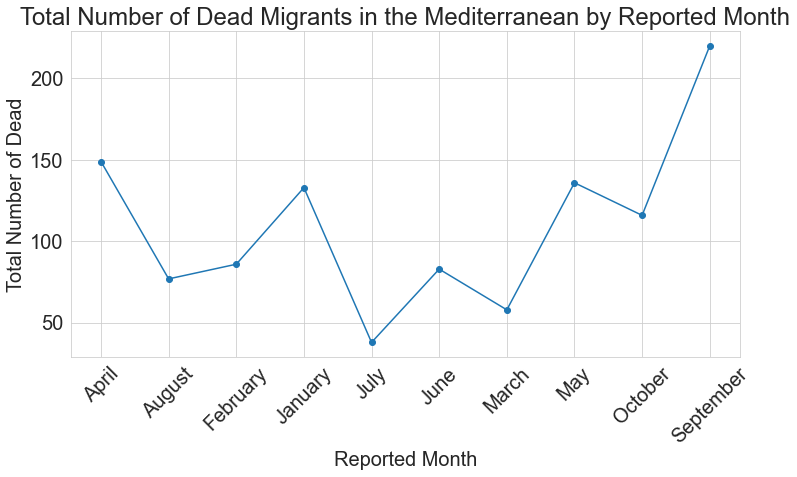

Total Number of Dead Migrants in the Mediterranean by Reported Month:
Reported Month
April        149
August        77
February      86
January      133
July          38
June          83
March         58
May          136
October      116
September    220
Name: Total Number of Dead and Missing, dtype: int64


In [200]:
# Filter data for the Mediterranean region
mediterranean_data = migrantsdf[migrantsdf['Region'] == 'Mediterranean']

# Group the data by reported month and sum the total dead
monthly_deaths = mediterranean_data.groupby('Reported Month')['Total Number of Dead and Missing'].sum()

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(monthly_deaths.index, monthly_deaths.values, marker='o')
plt.xlabel('Reported Month')
plt.ylabel('Total Number of Dead')
plt.title('Total Number of Dead Migrants in the Mediterranean by Reported Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Print the results
print("Total Number of Dead Migrants in the Mediterranean by Reported Month:")
print(monthly_deaths)


In [201]:
map = folium.Map()

In [202]:
marker_cluster = MarkerCluster().add_to(map)

for index, row in migrantsdf.iterrows():
    # Extract the latitude and longitude coordinates from the 'Coordinates' column
    coordinates = row['Coordinates'].split(',')
    latitude = float(coordinates[0])
    longitude = float(coordinates[1])

    # Add a marker to the map for each incident
    folium.Marker(location=[latitude, longitude], popup=row['Location of death']).add_to(marker_cluster)


In [203]:
map

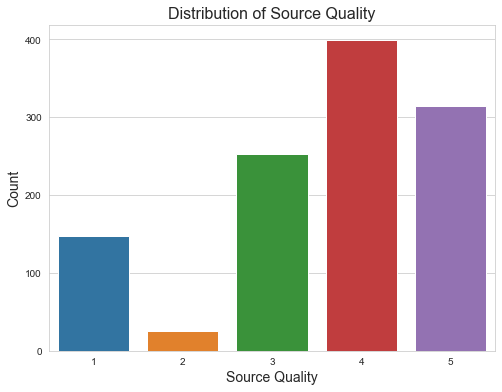

In [204]:
# Explore the distribution of "Source Quality"
plt.figure(figsize=(8, 6))  # Increase the figure size
sns.countplot(data=migrantsdf, x='Source Quality')
plt.title('Distribution of Source Quality', fontsize=16)  # Set the title and its fontsize
plt.xlabel('Source Quality', fontsize=14)  # Set the x label and its fontsize
plt.ylabel('Count', fontsize=14)  # Set the y label and its fontsize
plt.xticks(fontsize=10)  # Set the fontsize of x-axis ticks
plt.yticks(fontsize=10)  # Set the fontsize of y-axis ticks
plt.show()


Source Quality
1     196
2      59
3     614
4    1038
5    1125
Name: Total Number of Dead and Missing, dtype: int64


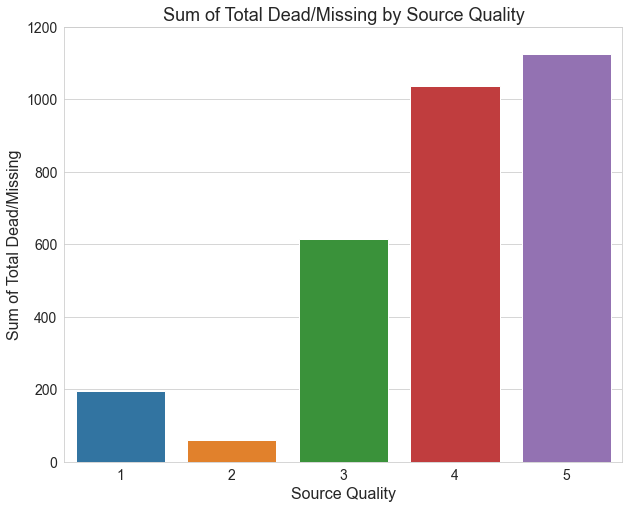

In [231]:
# Group the data by "Source Quality" and sum the "Total Dead/Missing" values
result = migrantsdf.groupby('Source Quality')['Total Number of Dead and Missing'].sum()

print(result)

# Reset the index of the result to convert it into a DataFrame
result = result.reset_index()

# Set the figure size
plt.figure(figsize=(10, 8))

# Plot the modified graph
sns.barplot(data=result, x='Source Quality', y='Total Number of Dead and Missing')
plt.title('Sum of Total Dead/Missing by Source Quality', fontsize=18)
plt.xlabel('Source Quality', fontsize=16)
plt.ylabel('Sum of Total Dead/Missing', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 1200)  # Adjust the y-label scale to better visualize the plot

# Show the modified graph
plt.show()

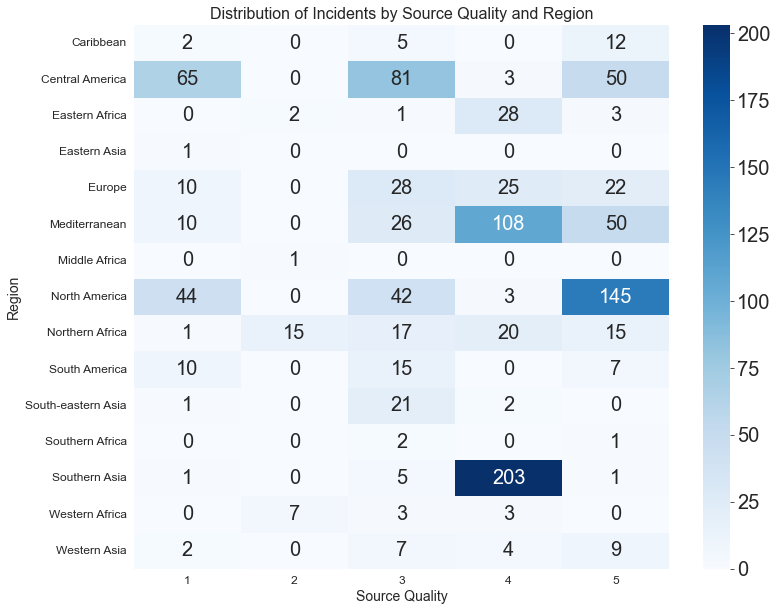

In [206]:
# Step 3: Analyze potential biases in reporting
# Distribution of incidents by source quality and region
df_pivot = migrantsdf.pivot_table(index='Region', columns='Source Quality', values='Incident ID', aggfunc='count', fill_value=0)
plt.figure(figsize=(12, 10))  # Increase the figure size
sns.heatmap(df_pivot, cmap='Blues', annot=True, fmt='g')
plt.title('Distribution of Incidents by Source Quality and Region', fontsize=16)  # Set the title and its fontsize
plt.xlabel('Source Quality', fontsize=14)  # Set the x label and its fontsize
plt.ylabel('Region', fontsize=14)  # Set the y label and its fontsize
plt.xticks(fontsize=12)  # Set the fontsize of x-axis ticks
plt.yticks(fontsize=12)  # Set the fontsize of y-axis ticks
plt.show()


In [207]:
categorical_features = migrantsdf[["Region","Reported Month", "Cause of Death"]]


In [208]:
numerical_features = migrantsdf[["Minimum Estimated Number of Missing","Number Dead","Total Number of Dead and Missing"]]


                                     Minimum Estimated Number of Missing  \
Minimum Estimated Number of Missing                             1.000000   
Number Dead                                                     0.212396   
Total Number of Dead and Missing                                0.823628   

                                     Number Dead  \
Minimum Estimated Number of Missing     0.212396   
Number Dead                             1.000000   
Total Number of Dead and Missing        0.729125   

                                     Total Number of Dead and Missing  
Minimum Estimated Number of Missing                          0.823628  
Number Dead                                                  0.729125  
Total Number of Dead and Missing                             1.000000  


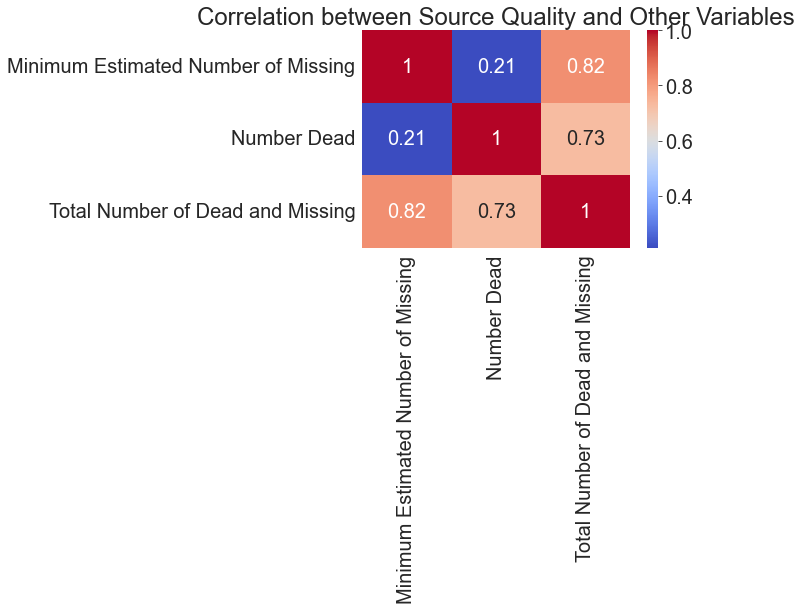

In [232]:
# Step 4: Additional analysis
# Correlation between source quality and other variables
df_corr = numerical_features
corr_result = df_corr.corr()
print(corr_result)
sns.heatmap(corr_result, annot=True, cmap='coolwarm')
plt.title('Correlation between Source Quality and Other Variables')
plt.show()

In [210]:
final_migrants_df = migrantsdf[["Region","Reported Month", "Cause of Death", "Source Quality","Number Dead","Minimum Estimated Number of Missing","Total Number of Dead and Missing"]]


In [211]:
final_migrants_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1139 entries, 0 to 1237
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Region                               1139 non-null   object 
 1   Reported Month                       1139 non-null   object 
 2   Cause of Death                       1139 non-null   object 
 3   Source Quality                       1139 non-null   int64  
 4   Number Dead                          1139 non-null   float64
 5   Minimum Estimated Number of Missing  1139 non-null   float64
 6   Total Number of Dead and Missing     1139 non-null   int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 71.2+ KB


In [212]:
# Perform one-hot encoding on the categorical columns
encoded_df = pd.get_dummies(final_migrants_df[['Region', 'Reported Month', 'Cause of Death']])

# Concatenate the encoded columns with the numerical columns
processed_df = pd.concat([encoded_df, final_migrants_df[['Source Quality', 'Number Dead', 'Minimum Estimated Number of Missing','Total Number of Dead and Missing']]], axis=1)

# Print the processed DataFrame
print(processed_df.head())


   Region_Caribbean  Region_Central America  Region_Eastern Africa  \
0                 0                       0                      0   
1                 0                       0                      0   
2                 0                       0                      0   
3                 0                       0                      0   
4                 0                       0                      0   

   Region_Eastern Asia  Region_Europe  Region_Mediterranean  \
0                    0              0                     1   
1                    0              0                     1   
2                    0              0                     0   
3                    0              0                     1   
4                    0              0                     0   

   Region_Middle Africa  Region_North America  Region_Northern Africa  \
0                     0                     0                       0   
1                     0                     0         

In [213]:
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1139 entries, 0 to 1237
Data columns (total 36 columns):
 #   Column                                                                                 Non-Null Count  Dtype  
---  ------                                                                                 --------------  -----  
 0   Region_Caribbean                                                                       1139 non-null   uint8  
 1   Region_Central America                                                                 1139 non-null   uint8  
 2   Region_Eastern Africa                                                                  1139 non-null   uint8  
 3   Region_Eastern Asia                                                                    1139 non-null   uint8  
 4   Region_Europe                                                                          1139 non-null   uint8  
 5   Region_Mediterranean                                                        

In [229]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Split the data into training and testing sets
X = processed_df.drop('Total Number of Dead and Missing', axis=1)
y = processed_df['Total Number of Dead and Missing']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the random forest regressor
regressor = RandomForestRegressor()

# Fit the regressor on the training data
regressor.fit(X_train, y_train)

# Predict the target variable for the testing data
y_pred = regressor.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", round(mse,2))
print("Mean Absolute Error:", round(mae,2))
print("R-squared:", round(r2,2))


Mean Squared Error: 0.37
Mean Absolute Error: 0.14
R-squared: 0.99


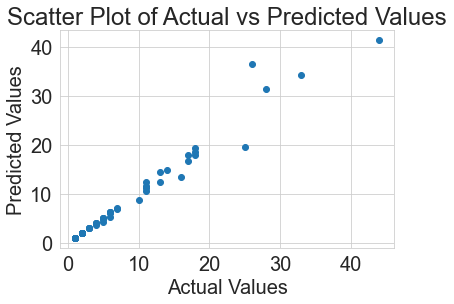

In [215]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Actual vs Predicted Values')
plt.show()


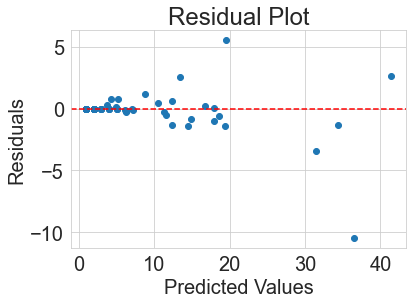

In [216]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


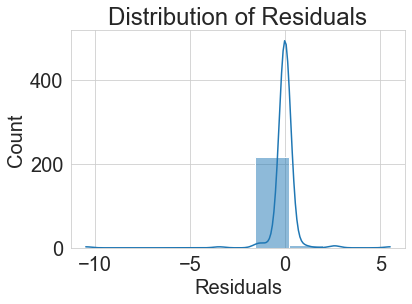

In [217]:

residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.title('Distribution of Residuals')
plt.show()
